# **IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing file

In [ ]:
from google.colab import files
#uploading the files
uploaded=files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
#Reading the uploaded files and creating training and testing data
train_data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# **EDA(Exploratory Data analysis)**

In [ ]:
#used to quickly view first few rows of the data frame, by default it takes 5 rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.   PassengerId: Unique identifier for each passenger.
2.  Survived: Survival status (1 = survived, 0 = did not survive).
3. Pclass: Passenger’s class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. Name: Full name of the passenger.
5. Sex: Gender of the passenger (male or female).
6. Age: Age of the passenger in years (some entries are missing).
7. SibSp: Number of siblings/spouses aboard the Titanic.
8. Parch: Number of parents/children aboard the Titanic
9. Ticket: Ticket number of the passenger.
10. Fare: Fare paid for the ticket (in British pounds).
11. Cabin: Cabin number assigned to the passenger.
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).



In [ ]:
#provides a concise summary of the dataframe, it also shows the memory uses of the dataframes
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#It provides summary statistics for the numerical columns in  the dataframe, include mean ,std,min etc.
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#handling Numerical and Categorical data Seperately
#The categorical data will be encoded into numerical data later on !!
df_num=train_data[["Age","SibSp","Parch","Fare"]]
df_cat=train_data[["Survived","Sex","Cabin","Embarked","Ticket"]]

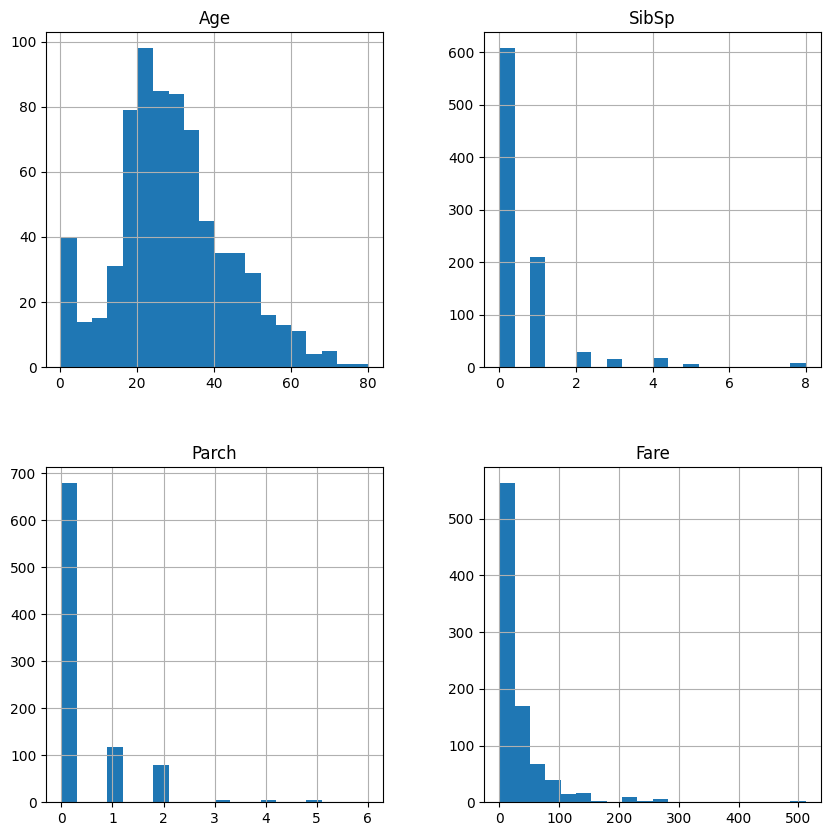

In [ ]:
#plotting the histograms for nmerical data
df_num.hist(bins=20, figsize=(10, 10))
plt.show()

Text(0, 0.5, 'Fare')

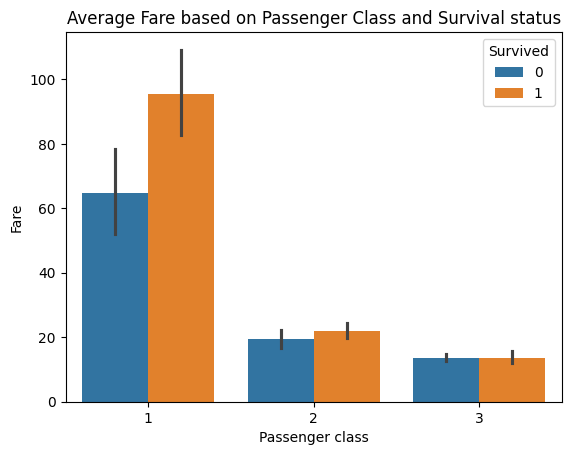

In [ ]:
sns.barplot(data=train_data,x='Pclass',y="Fare",hue="Survived")
plt.title("Average Fare based on Passenger Class and Survival status")
plt.xlabel("Passenger class")
plt.ylabel("Fare")

In [ ]:
#Grouping thw data by the 'survived' column
pd.pivot_table(train_data, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


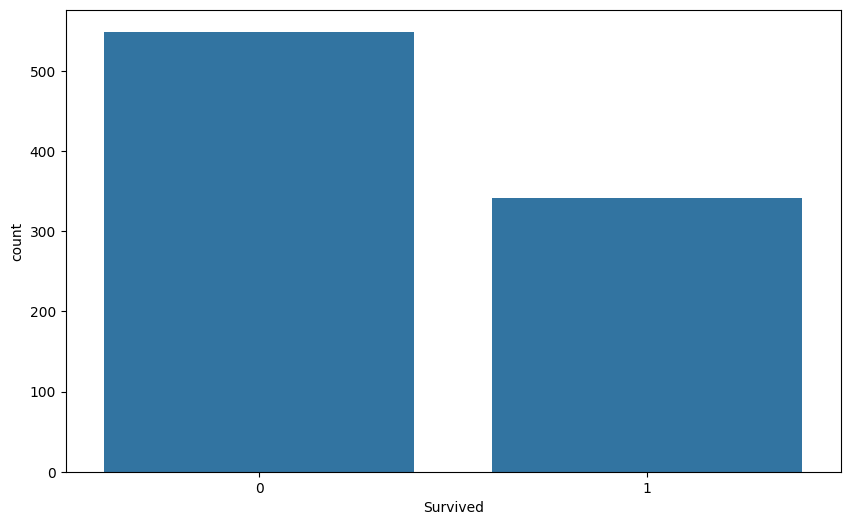

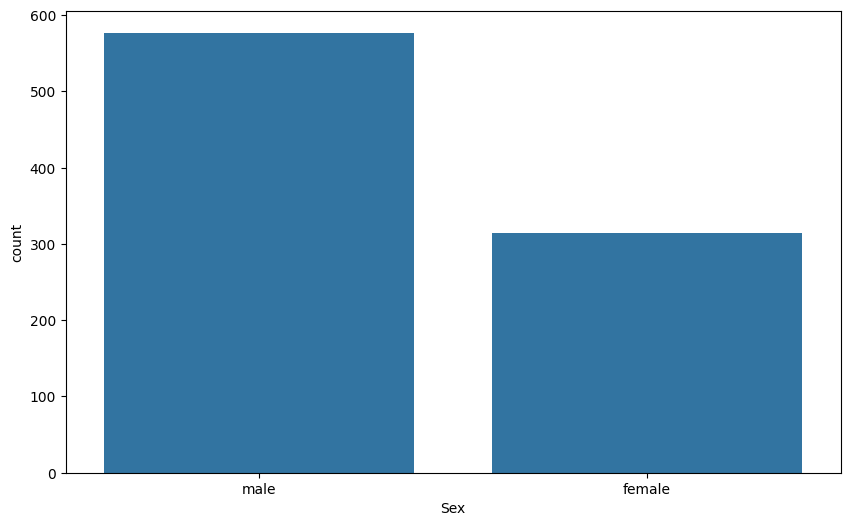

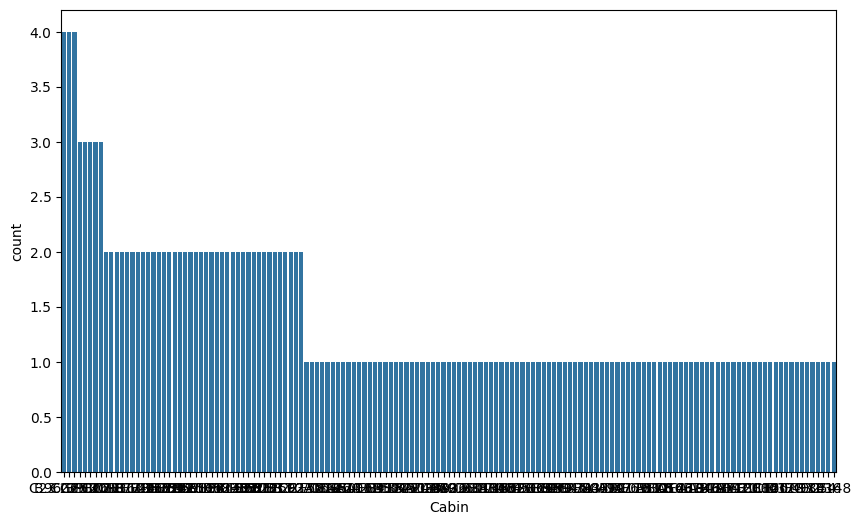

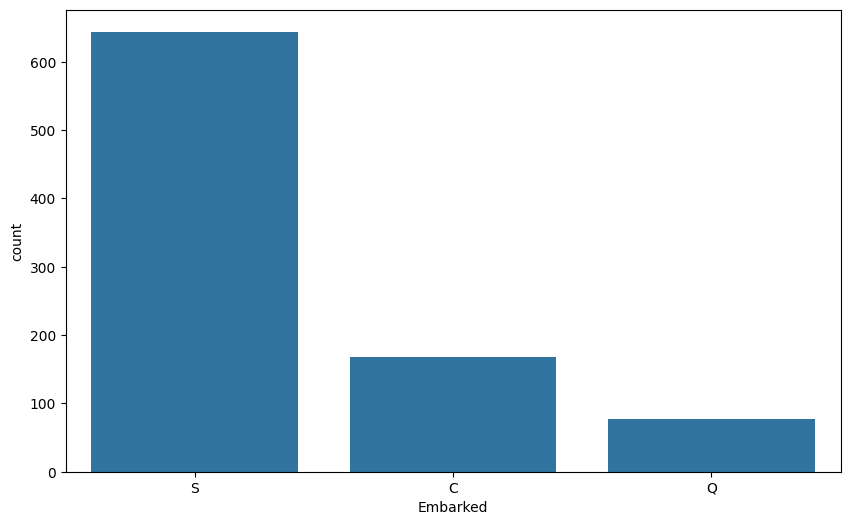

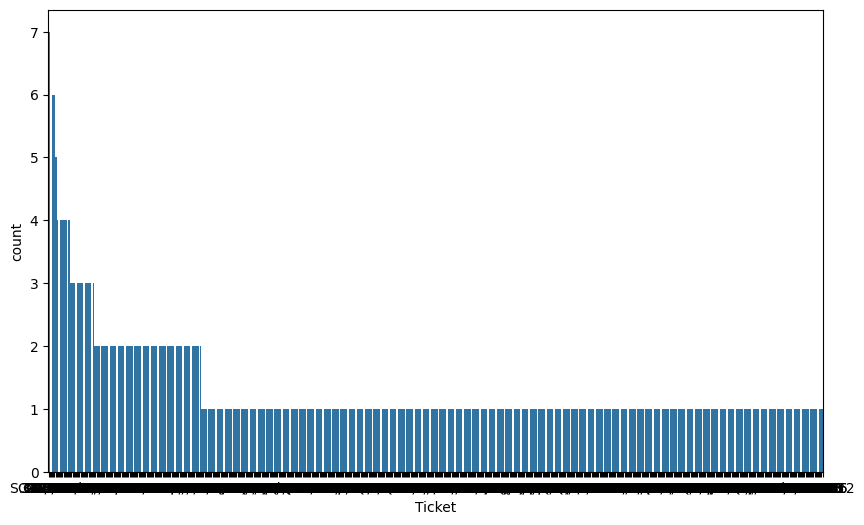

In [ ]:
#Creating the barplots for each categorical column in the dataframe
for i in df_cat.columns:
    plt.figure(figsize=(10,6))#sets the figure size in inches
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.show()

In [ ]:
# Create pivot table for 'Sex'
x = pd.pivot_table(
    train_data,
    index="Survived",
    columns="Sex",
    values="Ticket",
    aggfunc="count"
)
print(x)
print()

# Create and print pivot table for 'Pclass'
y= pd.pivot_table(
    train_data,
    index="Survived",
    columns="Pclass",
    values="Ticket",
    aggfunc="count"
)
print(y)
print()

# Create and print pivot table for 'Embarked'
z= pd.pivot_table(
    train_data,
    index="Survived",
    columns="Embarked",
    values="Ticket",
    aggfunc="count"
)
print(z)
print()

# Print the DataFrame x
print(x)


Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

Sex       female  male
Survived              
0             81   468
1            233   109


# **DATA CLEANING**

In [ ]:
#using isnull().sum() for checkng number of null values in each column
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Dropping irrelevent datatypes/columns
train_data=train_data.drop(columns=["PassengerId","Cabin","Ticket","Name"])
train_data.isnull().sum()
train_data.head()


KeyError: "['PassengerId', 'Cabin', 'Ticket', 'Name'] not found in axis"

In [ ]:
train_data.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [ ]:
#Filling null values with average values
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["Embarked"]=train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [ ]:
print(train_data.iloc[887])


Survived         1
Pclass           1
Sex         female
Age           19.0
SibSp            0
Parch            0
Fare          30.0
Embarked         S
Name: 887, dtype: object


<Axes: >

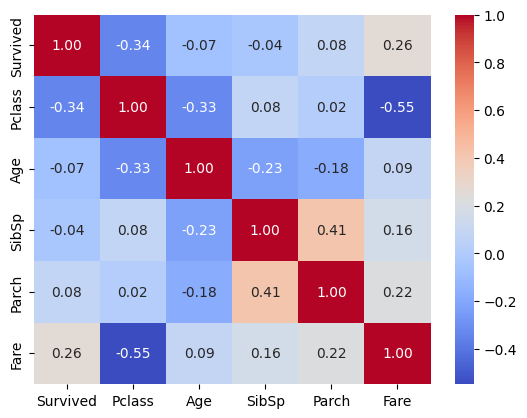

In [ ]:
#plotting the corelation matrix to see whether the numeric data columnns are corelated
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

In [ ]:
#Converting the categorical variables into the numerical variables
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for i in cols:
    train_data[i] = le.fit_transform(train_data[i])

train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
#Seperating Inputs and OUtput
X = train_data.drop(columns=["Survived"], axis=1)
y = train_data["Survived"]
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

#Splittinng the data into test and train data
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40#random_state=40 ensures that the split between training and testing data is the same every time you run the code.
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))#Evaluating the model

    score = cross_val_score(model, X, y, cv=5)#Cross-Validation(k-fold)
    print("CV SCORE :", np.mean(score))

# **Different algorithms**

In [ ]:
#Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7757847533632287
CV SCORE : 0.7621116063021781


In [ ]:
#Xgboost Classifier
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)


Accuracy 0.8161434977578476
CV SCORE : 0.8148327160881301


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)


Accuracy 0.820627802690583
CV SCORE : 0.8114807607808675


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8071748878923767
CV SCORE : 0.786761659657272


In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [39]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [40]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [41]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [42]:
X_test = test.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"], axis=1)

X_test["Age"] = X_test["Age"].fillna(X_test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].mean())

X_test.isnull().sum()

from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()

for col in cols:
    X_test[col] = le.fit_transform(X_test[col])

X_test.head()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [43]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
#Let's ask our model
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


def get_user_input():
    Pclass = int(input("Enter Pclass (1, 2, or 3): "))
    Sex = int(input("Enter Sex (0 for male, 1 for female): "))
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter number of siblings/spouses aboard: "))
    Parch = int(input("Enter number of parents/children aboard: "))
    Fare = float(input("Enter Fare: "))
    Embarked = int(input("Enter Embarked (0 for C, 1 for Q, 2 for S): "))

    user_data = {
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    }

    return pd.DataFrame(user_data)

def predict_survival(model, user_input):
    prediction = model.predict(user_input)
    return prediction[0]

# Get user input
user_input = get_user_input()

# Predict survival
prediction = predict_survival(model, user_input)

# Output the prediction
if prediction == 1:
    print("The model predicts that the passenger would survive.")
else:
    print("The model predicts that the passenger would not survive.")


Enter Pclass (1, 2, or 3): 1
Enter Sex (0 for male, 1 for female): 0
Enter Age: 34
Enter number of siblings/spouses aboard: 2
Enter number of parents/children aboard: 1
Enter Fare: 9.6875
Enter Embarked (0 for C, 1 for Q, 2 for S): 0
The model predicts that the passenger would survive.
